## 01. Import Libraries

In [17]:
#import libraries 
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 
import plotly.express as px
from fractions import Fraction # Library to calculate fractions

## 02. Import Path & Data Set 

In [2]:
# Project folder shortcut path 
path = r'C:\Users\Gregor\ownCloud\CareerFoundry\6.1\WorldUniversityRankings'

In [3]:
path

'C:\\Users\\Gregor\\ownCloud\\CareerFoundry\\6.1\\WorldUniversityRankings'

In [130]:
# import World University Rankings cleaned data set
df = pd.read_csv(os.path.join(path, 'Prepared Data', 'timesData_cleaned.csv'), index_col = 0)

In [131]:
df

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,25.0,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,2243.0,6.9,27.0,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,33.0,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,7.8,22.0,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,7929.0,8.4,27.0,45 : 55,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2598,601-800,Yeungnam University,South Korea,18.6,24.3,10.9,26.5,35.4,-,21958.0,15.3,3.0,48 : 52,2016
2599,601-800,Yıldız Technical University,Turkey,14.5,14.9,7.6,19.3,44.0,-,31268.0,28.7,2.0,36 : 64,2016
2600,601-800,Yokohama City University,Japan,24.0,16.1,10.2,36.4,37.9,-,4122.0,3.7,3.0,NaN,2016
2601,601-800,Yokohama National University,Japan,20.1,23.3,16.0,13.5,40.4,-,10117.0,12.1,8.0,28 : 72,2016


## Task Step 2 - Pick Variables

In [134]:
#change the datatype of the female_male_ratio column 
df['female_male_ratio'] = [str(i).replace(" ", "") for i in df['female_male_ratio']]

In [135]:
#change the datatype of the female_male_ratio column 
df['female_male_ratio'] = [(str(i).replace("nan", "0")) for i in df['female_male_ratio']]

In [136]:
#change the datatype of the female_male_ratio column 
df['female_male_ratio'] = [(str(i).replace("-", "0")) for i in df['female_male_ratio']]

In [138]:
#change the datatype of the female_male_ratio column 
df['female_male_ratio'] = [(str(i).replace(":", "/")) for i in df['female_male_ratio']]

In [139]:
#change the datatype of the female_male_ratio column 
df['female_male_ratio'] = [Fraction(str(i).replace("100/0", "100")) for i in df['female_male_ratio']]

In [140]:
#change the datatype of the female_male_ratio column to float
df['female_male_ratio'] = [float(Fraction(str(i).replace("", ""))) for i in df['female_male_ratio']]

In [141]:
df['female_male_ratio']

0       0.000000
1       0.492537
2       0.587302
3       0.724138
4       0.818182
          ...   
2598    0.923077
2599    0.562500
2600    0.000000
2601    0.388889
2602    0.754386
Name: female_male_ratio, Length: 2603, dtype: float64

In [108]:
# Create subset including: world_rank 	teaching 	international 	research 	citations 	income 	total_score 	num_students 	student_staff_ratio 	international_students 	female_male_ratio
df_sub2 = df[['world_rank', 'teaching', 'international', 'research', 'citations', 'income','total_score','num_students','student_staff_ratio','international_students','female_male_ratio']]

In [144]:
# Create subset including: world_rank 	teaching 	international 	research 	citations 	income 	total_score 	num_students 	student_staff_ratio 	international_students 	female_male_ratio
df_sub = df[['world_rank', 'teaching', 'international', 'research', 'citations', 'income','total_score','num_students','student_staff_ratio','international_students','female_male_ratio','year']]

In [37]:
df_sub

,world_rank,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio
0,1,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,25.0,0.000000
1,2,97.7,54.6,98.0,99.9,83.7,96.0,2243.0,6.9,27.0,0.492537
2,3,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,33.0,0.587302
3,4,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,7.8,22.0,0.724138
4,5,90.9,70.3,95.4,99.9,-,94.2,7929.0,8.4,27.0,0.818182
...,...,...,...,...,...,...,...,...,...,...,...
2598,601-800,18.6,24.3,10.9,26.5,35.4,-,21958.0,15.3,3.0,0.923077
2599,601-800,14.5,14.9,7.6,19.3,44.0,-,31268.0,28.7,2.0,0.562500
2600,601-800,24.0,16.1,10.2,36.4,37.9,-,4122.0,3.7,3.0,0.000000
2601,601-800,20.1,23.3,16.0,13.5,40.4,-,10117.0,12.1,8.0,0.388889


In [151]:
df_sub.shape

(2603, 12)

In [142]:
df_2016 = df.loc[df['year'] == 2016]
pd.set_option('display.max_rows', 200)

In [143]:
df_2016.shape

(800, 14)

## Task Step 3 - Create Correlation Matrix Heatmap

In [154]:
df_sub_top200_2016 = df_2016[df_2016['world_rank'].str.len()<5]
df_sub_top200_2016.shape

(200, 14)

In [155]:
# Focus only on the top 200 Universities
mask = (df_sub['world_rank'].str.len() < 5) 
df_sub_top200 = df_sub.loc[mask]

In [156]:
pd.set_option('display.max_rows', 10)
df_sub_top200

,world_rank,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,25.0,0.000000,2011
1,2,97.7,54.6,98.0,99.9,83.7,96.0,2243.0,6.9,27.0,0.492537,2011
2,3,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,33.0,0.587302,2011
3,4,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,7.8,22.0,0.724138,2011
4,5,90.9,70.3,95.4,99.9,-,94.2,7929.0,8.4,27.0,0.818182,2011
...,...,...,...,...,...,...,...,...,...,...,...,...
1998,=196,30.9,84.3,27.5,81.5,34.7,49.2,20174.0,15.2,29.0,1.000000,2016
1999,=196,25.6,69.5,18.1,100.0,37.7,49.2,2958.0,13.4,17.0,1.564103,2016
2000,198,30.8,55.9,27.4,87.7,47.1,49.1,16841.0,43.2,8.0,1.040816,2016
2001,199,30.5,64.9,22.9,91.0,29.0,48.9,27756.0,14.8,17.0,1.702703,2016


In [157]:
# Delete any '=' in the data set
df_sub_top200['world_rank'] = [(str(i).replace("=", "")) for i in df_sub_top200['world_rank']]

C:\Users\Gregor\AppData\Local\Temp\ipykernel_10520\1141621529.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub_top200['world_rank'] = [(str(i).replace("=", "")) for i in df_sub_top200['world_rank']]


In [158]:
df_sub_top200

,world_rank,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,25.0,0.000000,2011
1,2,97.7,54.6,98.0,99.9,83.7,96.0,2243.0,6.9,27.0,0.492537,2011
2,3,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,33.0,0.587302,2011
3,4,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,7.8,22.0,0.724138,2011
4,5,90.9,70.3,95.4,99.9,-,94.2,7929.0,8.4,27.0,0.818182,2011
...,...,...,...,...,...,...,...,...,...,...,...,...
1998,196,30.9,84.3,27.5,81.5,34.7,49.2,20174.0,15.2,29.0,1.000000,2016
1999,196,25.6,69.5,18.1,100.0,37.7,49.2,2958.0,13.4,17.0,1.564103,2016
2000,198,30.8,55.9,27.4,87.7,47.1,49.1,16841.0,43.2,8.0,1.040816,2016
2001,199,30.5,64.9,22.9,91.0,29.0,48.9,27756.0,14.8,17.0,1.702703,2016


In [159]:
# Replace any '-' in the data set with '0'
df_sub_top200['world_rank'] = [float(str(i).replace("-", "0")) for i in df_sub_top200['world_rank']]
df_sub_top200['teaching'] = [float(str(i).replace("-", "0")) for i in df_sub_top200['teaching']]
df_sub_top200['international'] = [float(str(i).replace("-", "0")) for i in df_sub_top200['international']]
df_sub_top200['research'] = [float(str(i).replace("-", "0")) for i in df_sub_top200['research']]
df_sub_top200['citations'] = [float(str(i).replace("-", "0")) for i in df_sub_top200['citations']]
df_sub_top200['income'] = [float(str(i).replace("-", "0")) for i in df_sub_top200['income']]
df_sub_top200['total_score'] = [float(str(i).replace("-", "0")) for i in df_sub_top200['total_score']]
df_sub_top200['num_students'] = [float(str(i).replace("-", "0")) for i in df_sub_top200['num_students']]
df_sub_top200['student_staff_ratio'] = [float(str(i).replace("-", "0")) for i in df_sub_top200['student_staff_ratio']]
df_sub_top200['international_students'] = [float(str(i).replace("-", "0")) for i in df_sub_top200['international_students']]
df_sub_top200['female_male_ratio'] = [float(str(i).replace("-", "0")) for i in df_sub_top200['female_male_ratio']]

C:\Users\Gregor\AppData\Local\Temp\ipykernel_10520\2380718012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub_top200['world_rank'] = [float(str(i).replace("-", "0")) for i in df_sub_top200['world_rank']]
C:\Users\Gregor\AppData\Local\Temp\ipykernel_10520\2380718012.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub_top200['teaching'] = [float(str(i).replace("-", "0")) for i in df_sub_top200['teaching']]
C:\Users\Gregor\AppData\Local\Temp\ipykernel_10520\2380718012.py:4: SettingWithCopyWar

In [160]:
df_sub_top200

,world_rank,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1.0,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,25.0,0.000000,2011
1,2.0,97.7,54.6,98.0,99.9,83.7,96.0,2243.0,6.9,27.0,0.492537,2011
2,3.0,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,33.0,0.587302,2011
3,4.0,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,7.8,22.0,0.724138,2011
4,5.0,90.9,70.3,95.4,99.9,0.0,94.2,7929.0,8.4,27.0,0.818182,2011
...,...,...,...,...,...,...,...,...,...,...,...,...
1998,196.0,30.9,84.3,27.5,81.5,34.7,49.2,20174.0,15.2,29.0,1.000000,2016
1999,196.0,25.6,69.5,18.1,100.0,37.7,49.2,2958.0,13.4,17.0,1.564103,2016
2000,198.0,30.8,55.9,27.4,87.7,47.1,49.1,16841.0,43.2,8.0,1.040816,2016
2001,199.0,30.5,64.9,22.9,91.0,29.0,48.9,27756.0,14.8,17.0,1.702703,2016


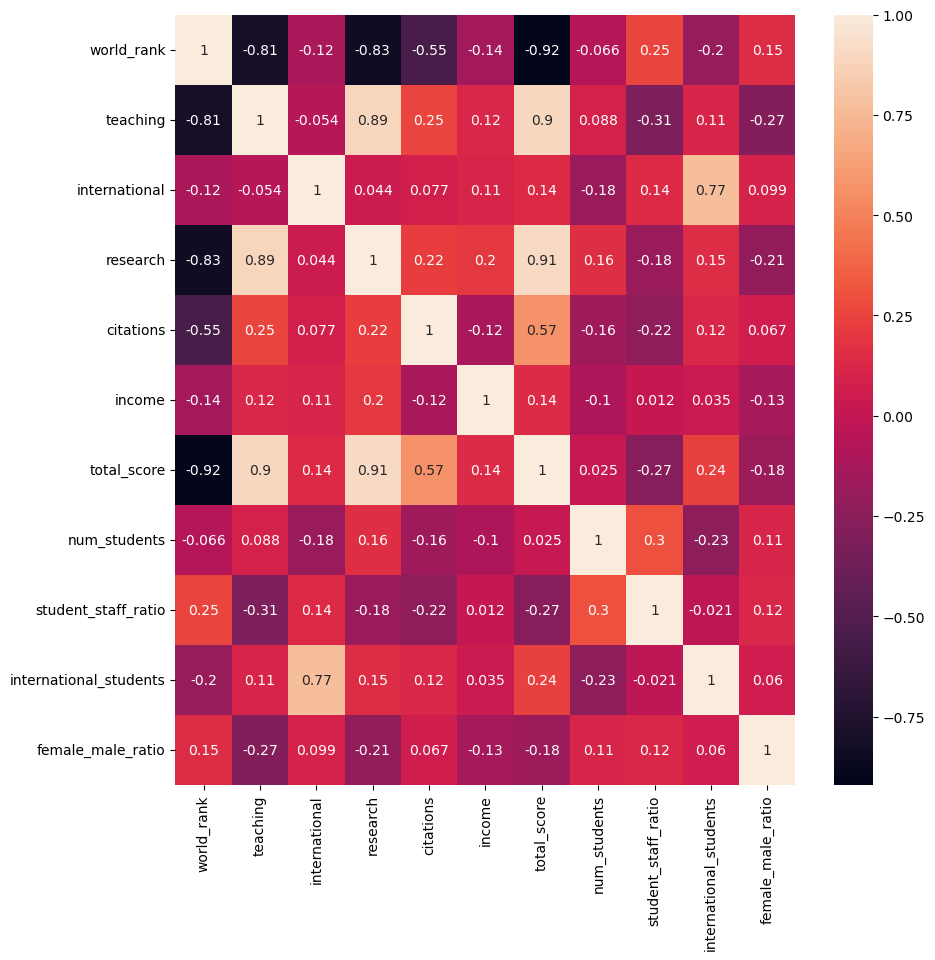

In [79]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr_1 = sns.heatmap(df_sub_top200.corr(), annot = True, ax = ax)

There are some strong negative correlations between world_rank and teaching, research, as well as total_score. This makes sense, since the larger the value of world_rank is (larger world_rank value means lower ranking), the lower the values of the corresponding performance indicators become. While citations still has a medium negative correlation, income and international do not have such a strong correlation. This is also in accordance with the weighting of the performance indicators, where income and international are weighted with 10% combined, whereas the other categories are weighted with 30% each. Therefore, it is also clear that the total_score has a strong positive correlation between teaching and research as well as a moderately positive correlation between citations. Furthermore, teaching and research have a strong positive correlation as well as international and international_students. The latter can be explained again, since a large part of the international value is determined by the international-to-domestic-student ratio, which is represented in the international_students variable. Most of the other values do not tend to have a strong positive or negative correlation.

In [167]:
#Export correlation heatmap
corr_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'heatmap.png'))

## Task Step 4 - Scatterplots

In [161]:
df_sub_top200_2016 = df_sub_top200.loc[df_sub_top200['year'] == 2016]
pd.set_option('display.max_rows', 200)
df_sub_top200_2016.shape

(200, 12)

In [162]:
df_sub_top200_2016

,world_rank,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1803,1.0,95.6,64.0,97.6,99.8,97.8,95.2,2243.0,6.9,27.0,0.492537,2016
1804,2.0,86.5,94.4,98.9,98.8,73.1,94.2,19919.0,11.6,34.0,0.851852,2016
1805,3.0,92.5,76.3,96.2,99.9,63.3,93.9,15596.0,7.8,22.0,0.724138,2016
1806,4.0,88.2,91.5,96.7,97.0,55.0,92.8,18812.0,11.8,34.0,0.851852,2016
1807,5.0,89.4,84.0,88.6,99.7,95.4,92.0,11074.0,9.0,33.0,0.587302,2016
1808,6.0,83.6,77.2,99.0,99.8,45.2,91.6,20152.0,8.9,25.0,0.000000,2016
1809,7.0,85.1,78.5,91.9,99.3,52.1,90.1,7929.0,8.4,27.0,0.818182,2016
1810,8.0,83.3,96.0,88.5,96.7,53.7,89.1,15060.0,11.7,51.0,0.587302,2016
1811,9.0,77.0,97.9,95.0,91.1,80.0,88.3,18178.0,14.7,37.0,0.449275,2016
1812,10.0,85.7,65.0,88.9,99.2,36.6,87.9,14221.0,6.9,21.0,0.724138,2016


In [163]:
df_sub_top200_2016.dtypes

world_rank                float64
teaching                  float64
international             float64
research                  float64
citations                 float64
income                    float64
total_score               float64
num_students              float64
student_staff_ratio       float64
international_students    float64
female_male_ratio         float64
year                        int64
dtype: object

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


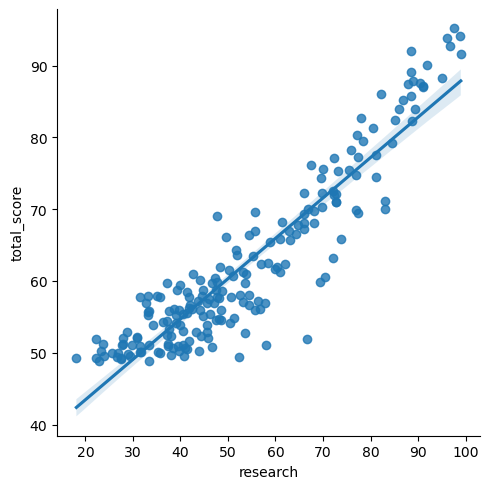

In [164]:
# Create scatterplot for the "research" and "total_score" columns
sns.lmplot(x = 'research', y = 'total_score', data = df_sub_top200_2016)

As discussed before, there is a strong positive correlation between research and the total_score of a University.

## Task Step 5 - Pair Plots

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

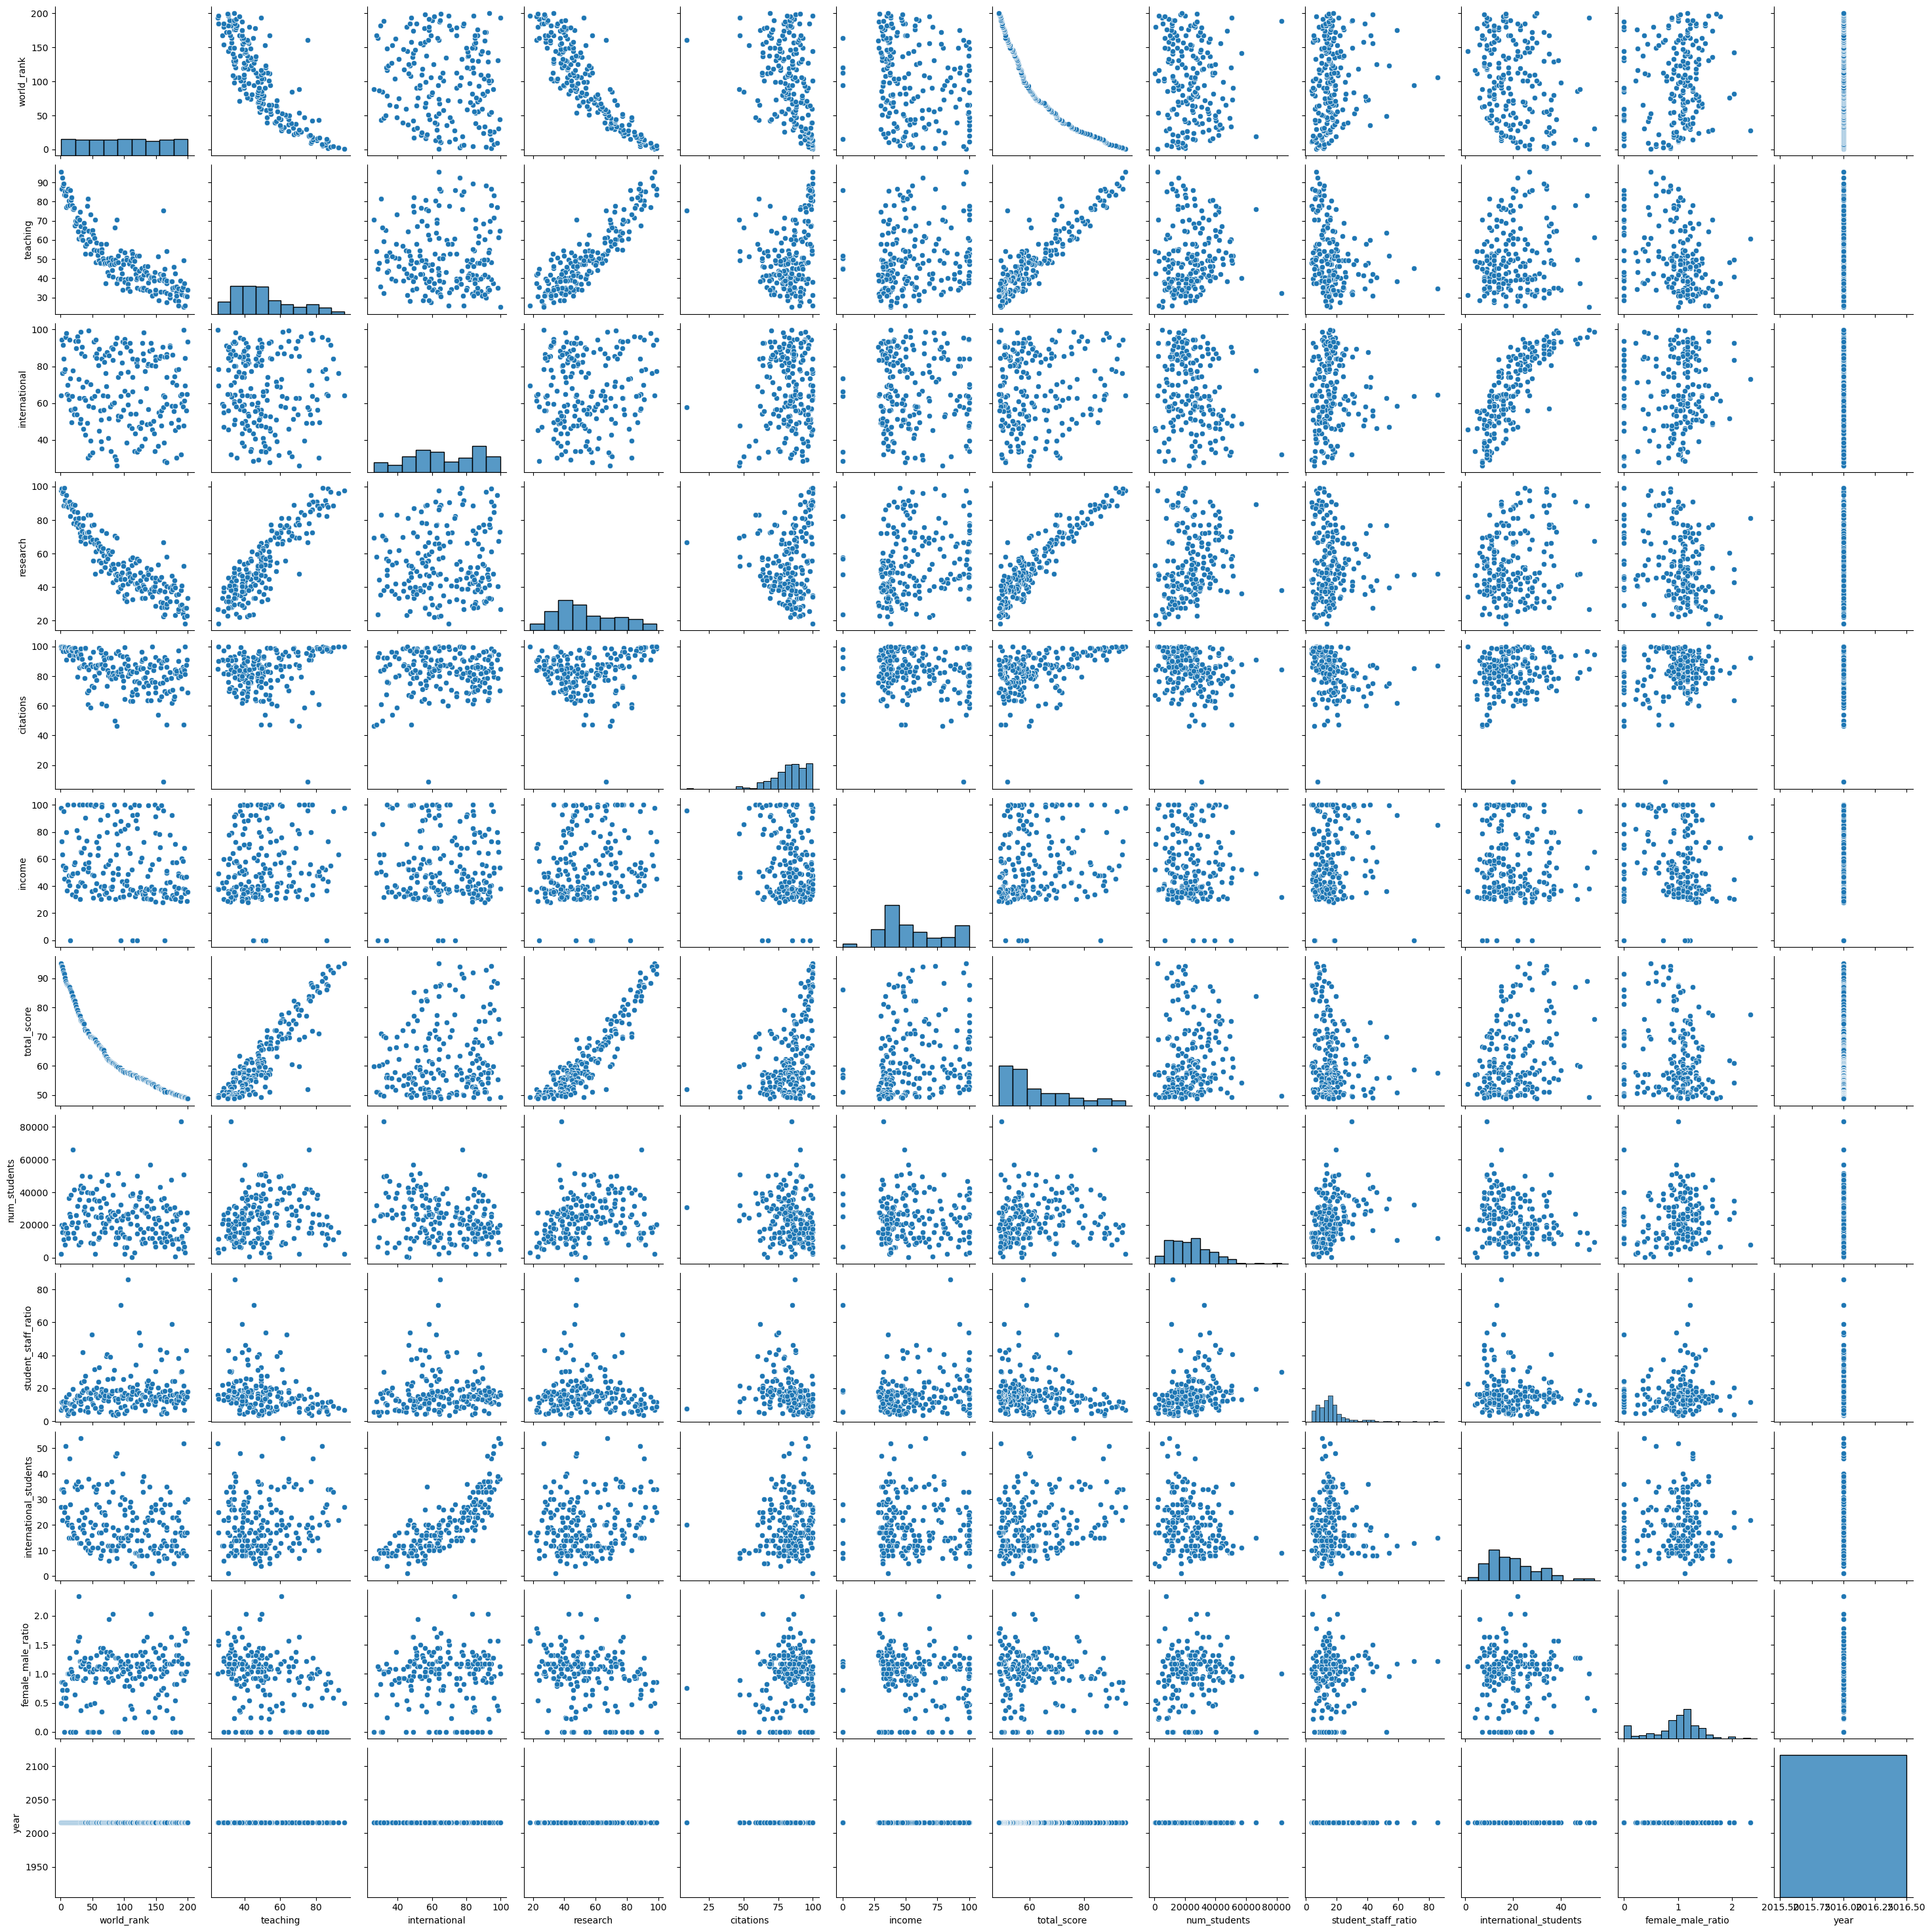

In [165]:
# Create pair plot
pairplot = sns.pairplot(df_sub_top200_2016)

Similar to the heatmap, one can deduce certain correlations from the pair plot. As before, the most prominent correlation is the one between the total_score and the world_rank, which perfectly illustrates the negative correlation. That is, the higher the value of the world rank, the lower the total score. Or, inversely described, the higher the total_score the lower the value of the world_rank which represents a better ranking of a University. The other variables with a high correlation can also be observed in the pair plot, but they do not follow such a perfect (inverse) correlation as the world_rank and total_score.

## Task Step 6 - Categorical Plot

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_students', ylabel='Count'>

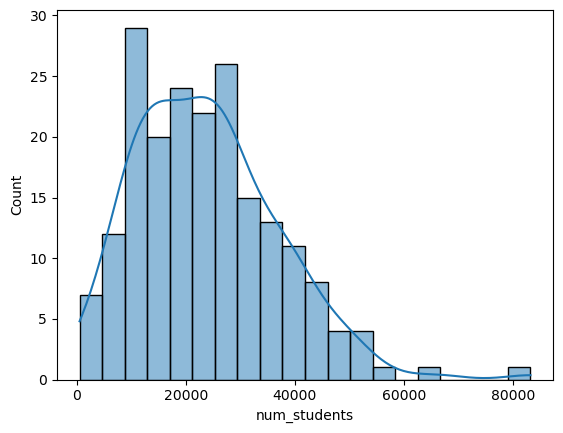

In [168]:
sns.histplot(df_sub_top200_2016['num_students'],bins = 20, kde = True)

In [172]:
#Apply flags according to University size in terms of student count
df_sub_top200_2016.loc[df_sub_top200_2016['num_students'] < 10000, 'University size in terms of students'] = 'small'
df_sub_top200_2016.loc[(df_sub_top200_2016['num_students'] >= 10000) & (df_sub_top200_2016['num_students'] < 30000), 'University size in terms of students'] = 'middle'
df_sub_top200_2016.loc[df_sub_top200_2016['num_students'] > 30000, 'University size in terms of students'] = 'large'

In [173]:
df_sub_top200_2016['University size in terms of students'].value_counts(dropna = False)

University size in terms of students
middle    115
large      56
small      27
NaN         2
Name: count, dtype: int64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

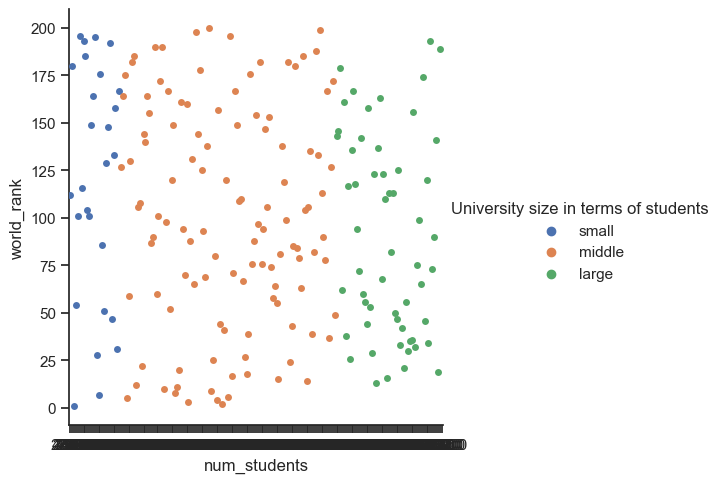

In [174]:
# Create Categorical Plot
sns.set(style = "ticks")
cat_1 = sns.catplot(x = 'num_students', y = 'world_rank', hue = 'University size in terms of students', data = df_sub_top200_2016)

The top 10 Universities have a student count below 30000 which is the threshold in the categorical plot to count as a large university. While this is a rather arbitrary categorization, it still shows that there are no universities with more than 30000 students in the best rated universities.

## Task Step 7 - Key Questions

#### Of all the universities in the world, which are the top 10?

The top 10 Universities are:

California Institute of Technology
University of Oxford
Stanford University
University of Cambridge
Massachusetts Institute of Technology
Harvard University
Princeton University
Imperial College London
ETH Zurich Swiss Federal Institute of Technology Zurich
University of Chicago


#### 	Why are certain categories weighted higher than others? Are these weightings reasonable?

As seen above in the heatmap as well as in the pair plot, there are strong correlations between the teaching, research and citations rating in comparison to the world_rank of a University. This should be expected, as these are major attributes of the University. On the other hand, the amount of income or number of international students are also relevant informations about a University, however not so much, as the other performance indicators. Therefore, it is reasonable to weight the former three categories with a weighting of 30% each, and leave the remainder for the other two categories.

#### Which of the top 10 Universities has the highest/lowest amount of students?

Harvard has the most number of students(20152) in the top 10 and California Institute of Technology the smalles number(2243).

####	How many students attend the top 10 Universities?

143184 students attend the top 10 Universities.

## Task Step 8 - Hypotheses

The Hypotheses I want to test later on is: There are more male than female students in the top 10 Universities.

In [175]:
# saving and exporting cleaned data set
df_sub_top200_2016.to_csv(os.path.join(path, 'Prepared Data', 'timesData_top200_2016.csv'))